# Cats VS Dogs Classification


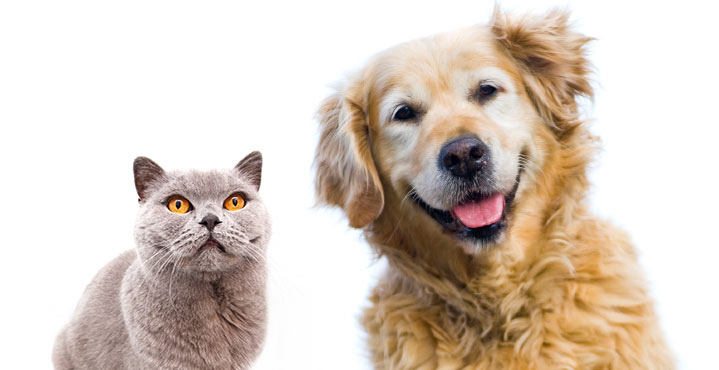

In [1]:
from IPython import display
display.Image("http://www.mypet.com/img/diabetes/2-5-1-DogCatLookingAtCamera-750x250.jpg")

- The data set for dogs versus cats refers to a data set used for the Kaggle machine learning competition held in   2013.<br>The data set consists of images of dogs and cats provided as a subset of images from a much larger data set<br> of 3 million images with manual comments.

## Import Libraries

In [85]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import plotly.express as px
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image

#import the model
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#import Preparations for the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#ignore warnings of python
import warnings
warnings.filterwarnings('ignore')

## Part 1 : Familiarity with the dataset

In this part we will present an initial introduction with the data.<br>
We will represent the shape of the data ,in addition, we will present the data visually.

the shape of the image : dog.100 is :  (397, 500, 3)
the shape of the image : dog.101 is :  (500, 440, 3)
the shape of the image : dog.102 is :  (373, 499, 3)
the shape of the image : dog.103 is :  (433, 499, 3)
the shape of the image : dog.105 is :  (221, 170, 3)
the shape of the image : dog.106 is :  (374, 500, 3)
the shape of the image : dog.107 is :  (458, 499, 3)
the shape of the image : dog.108 is :  (480, 259, 3)
the shape of the image : dog.110 is :  (375, 499, 3)


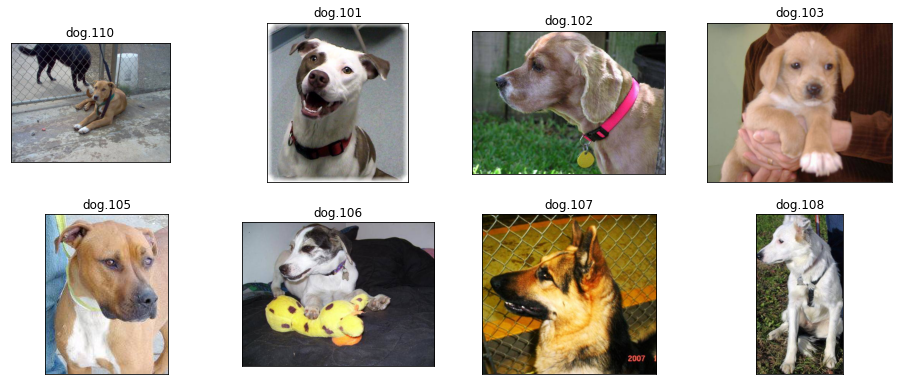

In [3]:
# plot the randomly a few images of dogs
folder = '/Users/twmrgwzln/Desktop/Cat vs Dogs/Cats_vs_Dog_DATA/train/'
img_range = [int(x) for x in np.linspace(start = 100, stop = 110, num = 9)]
plt.figure(figsize=(20,10))
for i in img_range:
    plt.subplot(250 + 1 + i)
    filename = folder + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('dog.' + str(i))
    plt.xticks([])
    plt.yticks([])
    print(f"the shape of the image : {'dog.' + str(i)} is : " , image.shape)
plt.show()

the shape of the image : cat.100 is :  (499, 403, 3)
the shape of the image : cat.101 is :  (200, 296, 3)
the shape of the image : cat.102 is :  (343, 349, 3)
the shape of the image : cat.103 is :  (386, 500, 3)
the shape of the image : cat.105 is :  (174, 215, 3)
the shape of the image : cat.106 is :  (374, 400, 3)
the shape of the image : cat.107 is :  (350, 499, 3)
the shape of the image : cat.108 is :  (332, 499, 3)
the shape of the image : cat.110 is :  (500, 374, 3)


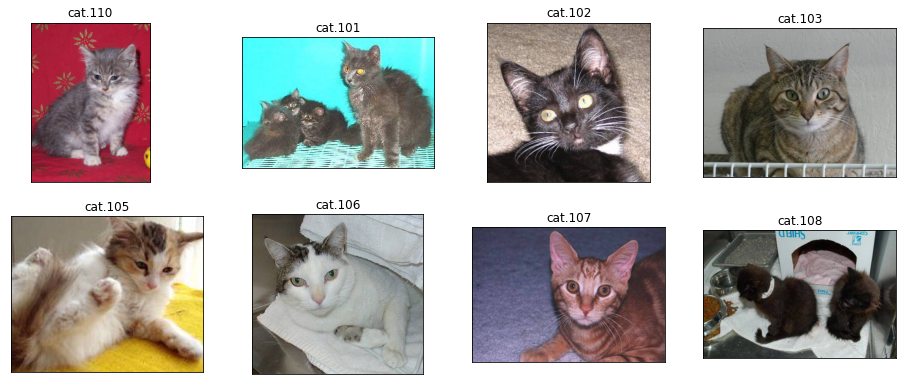

In [4]:
# plot the randomly a few images of Cats
img_range = [int(x) for x in np.linspace(start = 100, stop = 110, num = 9)]
plt.figure(figsize=(20,10))
for i in img_range:
    plt.subplot(250 + 1 + i )
    filename = folder + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('cat.' + str(i))
    plt.xticks([])
    plt.yticks([])
    print(f"the shape of the image : {'cat.' + str(i)} is : " , image.shape)
plt.show()

- **To conclusion** ,
It can be noticed that each image is different from the other in its **shape** <br>
Therefore we will need to resize them to a uniform size <br>
Also , we need to make Dataframe of the resized images

In [5]:
# load dogs vs cats dataset, reshape and save to a new file
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
    # determine class
    if file.startswith('cat'):
        output =0.0
    else :
        output =1.0
    # load image
    photo = load_img(folder + file, target_size=(50,50),color_mode='grayscale')
    # convert to numpy array
    photo = img_to_array(photo)
    # add to the list
    photos.append(photo)
    labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(25000, 50, 50, 1) (25000,)


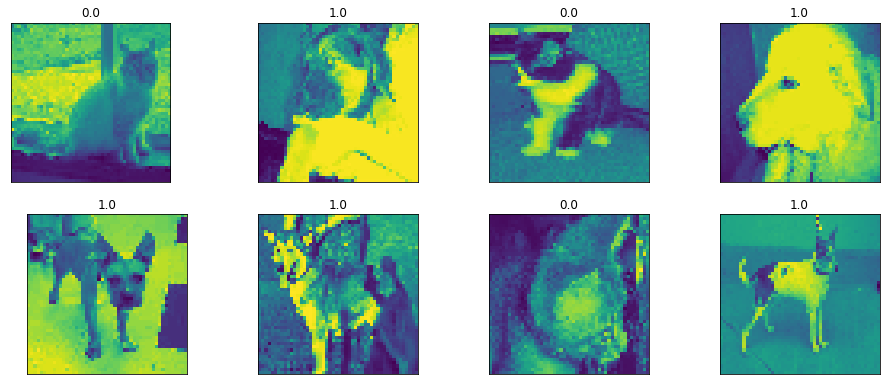

In [6]:
# plot a few images after the resize with label
img_range = [int(x) for x in np.linspace(start = 100, stop = 110, num = 9)]
plt.figure(figsize=(20,10))
for i in img_range:
    plt.subplot(250 + 1 + i )
    plt.imshow(photos[i])
    plt.title(labels[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

## Part 2 : Preparation dataset for analysis


In this chapter we will deal with the preparation of the data for analysis.<br>
That is, we will change the shape of the data to a state where we can work as a dataframe.<br>
In addition, we will check for missing values.<br>
We will get an idea of the amount of labels that exist in the training set.

In [7]:
# Reshape the data 
photos = photos.reshape(25000,50*50)
print("The shape of photos is :",photos.shape)

The shape of photos is : (25000, 2500)


In [8]:
# create DataFrame
df = pd.DataFrame(photos)

In [9]:
# Change name of columns
cols = list(df.columns)
df.rename(columns={cols[i]:'Pixel'+str(i) for i in range(len(cols)) } , inplace=True)

In [10]:
# Add label columns
df.insert(len(df.columns), 'labels', labels)

In [11]:
print("The shape of the data frame :",df.shape)

The shape of the data frame : (25000, 2501)


In [12]:
df.sample(5)

Pixel0  Pixel1  Pixel2  Pixel3  Pixel4  Pixel5  Pixel6  Pixel7  Pixel8  \
14556    82.0    82.0    84.0    92.0    93.0    95.0    96.0    95.0    97.0   
19304    69.0    27.0    47.0    53.0    71.0   136.0   155.0   204.0   212.0   
4628    134.0   113.0   157.0   136.0   119.0   117.0   131.0   131.0   121.0   
1937    242.0   206.0   113.0    57.0   189.0   235.0   225.0   175.0    87.0   
9277    160.0   235.0   142.0   111.0   111.0   161.0   111.0   135.0   132.0   

       Pixel9  ...  Pixel2491  Pixel2492  Pixel2493  Pixel2494  Pixel2495  \
14556    99.0  ...       62.0       96.0       57.0       63.0       57.0   
19304   216.0  ...      115.0       80.0       25.0        9.0       19.0   
4628    124.0  ...      135.0      114.0      136.0      131.0      133.0   
1937    241.0  ...       99.0       63.0       49.0      110.0      129.0   
9277    209.0  ...      104.0      102.0      119.0      105.0      108.0   

       Pixel2496  Pixel2497  Pixel2498  Pixel2499  labels  
14556       41.0       47.0       66.0       71.0     0.0  
19304       20.0       22.0       18.0       21.0     1.0  
4628       130.0      148.0      119.0      112.0     1.0  
1937       131.0      112.0      107.0      139.0     1.0  
9277       106.0      114.0      105.0      117.0     1.0  

[5 rows x 2501 columns]

In [13]:
df.describe()

Pixel0        Pixel1        Pixel2        Pixel3        Pixel4  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean     114.280281    114.885559    115.677963    116.346359    117.041840   
std       69.773438     69.419899     69.266396     69.276619     69.278854   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       57.000000     57.000000     58.000000     59.000000     60.000000   
50%      108.000000    109.000000    111.000000    111.000000    112.000000   
75%      165.250000    166.000000    167.000000    168.000000    169.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

             Pixel5        Pixel6        Pixel7        Pixel8        Pixel9  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean     117.681961    118.285522    118.762482    118.812157    119.305283   
std       69.255272     69.304764     69.066452     69.138039     69.107300   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       61.000000     61.000000     62.000000     61.000000     62.000000   
50%      113.000000    114.000000    115.000000    114.000000    115.000000   
75%      169.000000    170.000000    170.000000    171.000000    171.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

       ...     Pixel2491     Pixel2492     Pixel2493     Pixel2494  \
count  ...  25000.000000  25000.000000  25000.000000  25000.000000   
mean   ...    126.969963    126.198723    125.649117    125.180840   
std    ...     65.990967     65.911659     65.751717     65.888725   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     75.000000     75.000000     74.000000     74.000000   
50%    ...    126.000000    124.000000    124.000000    123.000000   
75%    ...    176.000000    175.000000    175.000000    174.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

          Pixel2495     Pixel2496     Pixel2497     Pixel2498     Pixel2499  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean     124.371323    123.437157    122.473961    121.365921    120.357559   
std       65.929176     65.837097     66.202164     66.386108     66.620575   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       72.000000     72.000000     71.000000     69.000000     68.000000   
50%      122.000000    122.000000    120.000000    119.000000    117.000000   
75%      173.000000    172.000000    171.000000    169.000000    168.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

            labels  
count  25000.00000  
mean       0.50000  
std        0.50001  
min        0.00000  
25%        0.00000  
50%        0.50000  
75%        1.00000  
max        1.00000  

[8 rows x 2501 columns]

In [14]:
# Check for missing values
df.isnull().sum().sum()

0

In [88]:
# Rename the column׳s label so that it is displayed in the graph as a word and not as a number
df['labels_1'] = df['labels'].copy()
k=df['labels_1'].replace({0.0 :'Cat',1.0 :'Dog'})

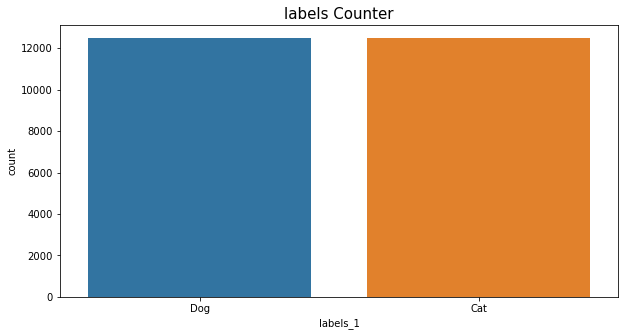

In [89]:
# plot graph for count values of labels
axis=plt.subplots(figsize = (10,5))
plt.title("labels Counter", size=15)
sns.countplot(k)

plt.show();

In [17]:
# Return to original Dataframe
df.drop(['labels_1'], axis=1, inplace=True)

## Part 3 : Data Split

In this chapter we will split the data for training and test<br>
Also, we want to scale the data in the training test.

In [18]:
# Divide the data into training and test
X = df.drop(columns=['labels'])
Y = df['labels']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100)

In [19]:
# Scale The Data 0-255 value of pixel
X_train = X_train / 255
X_test = X_test / 255

In [20]:
print("The shape of Testing the data :",X_test.shape)
print("The shape of Training the data :",X_train.shape)

The shape of Testing the data : (5000, 2500)
The shape of Training the data : (20000, 2500)


## Part 4 : Dimensionality Reduction 

PCA - Principal Component Analysis
Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm.
First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.
is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality 
reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data 
while preserving as much of the data's variation as possible. The first principal component can equivalently be 
defined as a direction that maximizes the variance of the projected data. 
("Hands On Machine Learning" ,Page 222),("wikipedia" ,PCA)

In [32]:
# Using PCA with 90% of the varriance
pca = PCA(n_components = 0.90)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

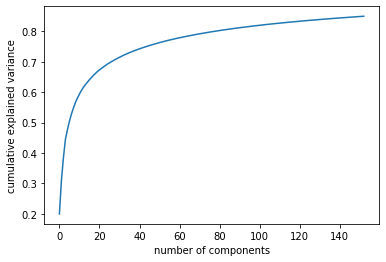

In [29]:
# Explained Variance Ratio
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [23]:
# Visualize PCA with px.scatter_3d
fig = px.scatter_3d(
    X_train_reduced , x=0, y=1, z=2, color=Y_train,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.show()

In [34]:
print(f"We decided to choose {pca.n_components_} number of components That explain 90% of the variance")

We decided to choose 348 number of components That explain 90% of the variance


In [35]:
print(f"We can pay attention that the shape of the training significantly decreased from {X_train.shape} to {X_train_reduced.shape} ")

We can pay attention that the shape of the training significantly decreased from (20000, 2500) to (20000, 348) 


## Part 4 : Training and Testing Models

In this chapter we will perform a test and training of the models.<br>
We will look at the models as we have learned in the past in the by using Dimensionality Reduction <br>
Moreover,we will try to push a number of model with hyperparameters tuning using randomizedsearch <br>
We will perform training for new models learned ensemble methods<br>

In [48]:
# Create a dummy model Classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_reduced,Y_train)
dummy_clf.predict(X)
dummy_clf.score(X,Y)

0.5

### Model #0 :  Naive Bayes

In [46]:
# Using naive bayes model 
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_reduced, Y_train)
y_predict_naive_bayes = naive_bayes.fit(X_train_reduced, Y_train).predict(X_test_reduced)
naive_bayes_accuracy = accuracy_score(Y_test , y_predict_naive_bayes)

In [47]:
print("The accuracy of Zero Model - Naive bayes is {:0.4f}%".format(naive_bayes_accuracy*100))

The accuracy of Zero Model - Naive bayes is 57.3200%


In [107]:
# Classification report
naive_bayes_prec = precision_score(y_predict_naive_bayes,Y_test, average='macro')
print('precision:',naive_bayes_prec)
naive_bayes_recall = recall_score(y_predict_naive_bayes,Y_test, average='macro')
print('recall:',naive_bayes_recall)
naive_bayes_f1 = f1_score(y_predict_naive_bayes,Y_test, average='macro')
print('f1:',naive_bayes_f1)
naive_bayes_f2 = metrics.fbeta_score(y_predict_naive_bayes, Y_test, beta=3,average='macro')
print("f2:",naive_bayes_f2)

precision: 0.5736810264646723
recall: 0.5773558598851835
f1: 0.5682756484321729
f2: 0.5743011893124865


### Weak learner classifiers

### Model #1 : KNN - K-Nearest Neighbors

In [51]:
# Using Knn model 
knn = KNeighborsClassifier()
knn.fit(X_train_reduced, Y_train)
y_predict_knn = knn.predict(X_test_reduced)
knn_accuracy = accuracy_score(Y_test,y_predict_knn)

In [52]:
print("The accuracy of KNN - K-Nearest Neighbors is {:0.4f}%".format(knn_accuracy*100))

The accuracy of KNN - K-Nearest Neighbors is 59.7600%


Text(0, 0.5, 'Testing Accuracy')

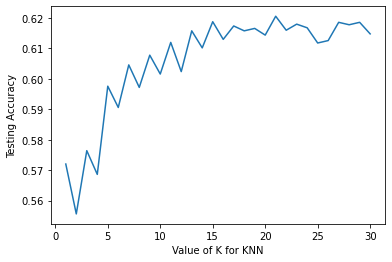

In [53]:
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_reduced,Y_train)
    y_predict_knn = knn.predict(X_test_reduced)
    scores.append(metrics.accuracy_score(Y_test,y_predict_knn))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [64]:
# Cross validition to find the best n_neighbors parameter
for k in range(2,31,2):
    knn_k = KNeighborsClassifier(n_neighbors = k )
    ValScore = cross_val_score(knn_k, X_train_reduced, Y_train, cv = 5).mean()
    print(f"Cross-validation score for k = {k} is:", ValScore)

Cross-validation score for k = 2 is: 0.5490999999999999
Cross-validation score for k = 4 is: 0.5623
Cross-validation score for k = 6 is: 0.5708
Cross-validation score for k = 8 is: 0.57795
Cross-validation score for k = 10 is: 0.57935
Cross-validation score for k = 12 is: 0.5866
Cross-validation score for k = 14 is: 0.5889
Cross-validation score for k = 16 is: 0.5932
Cross-validation score for k = 18 is: 0.5969
Cross-validation score for k = 20 is: 0.5988
Cross-validation score for k = 22 is: 0.60205
Cross-validation score for k = 24 is: 0.6014
Cross-validation score for k = 26 is: 0.6024499999999999
Cross-validation score for k = 28 is: 0.6055999999999999
Cross-validation score for k = 30 is: 0.6036999999999999


In [61]:
print(f"the best n_neighbors is k=23 :" ,0.6036499999999999 )

the best n_neighbors is k=23 : 0.6036499999999999


In [67]:
# Search for parameters to tune
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [68]:
# Define the options of the main parameters
weights = ['uniform','distance']
p = [1,2]
n_neighbors = [23]
metric = ['euclidean','manhattan' , 'chebyshev' ,'minkowski']

param_grid = { 'weights': weights ,
               'p' : p,
               'n_neighbors':n_neighbors,
               'metric' : metric }

In [72]:
# Using GridSearchCV with Kfold CV
kf = KFold(n_splits=10, random_state=42, shuffle=True)
knn_grid = GridSearchCV(estimator = knn, param_grid = param_grid, cv = kf, verbose=2, n_jobs = 4)
knn_grid.fit(X_train_reduced, Y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_neighbors=30), n_jobs=4,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [23], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [155]:
# print the best score of model that pick from grid search
print("The accuracy of KNN - K-Nearest Neighbors with grid search and Kfold is {:0.4f}%".format(knn_grid.best_score_*100))

The accuracy of KNN - K-Nearest Neighbors with grid search and Kfold is 60.0950%


In [106]:
# Classification report
knn_prec = precision_score(y_predict_knn,Y_test, average='macro')
print('precision:',knn_prec)
knn_recall = recall_score(y_predict_knn,Y_test, average='macro')
print('recall:',knn_recall)
knn_f1 = f1_score(y_predict_knn,Y_test, average='macro')
print('f1:',knn_f1)
knn_f2 = metrics.fbeta_score(y_predict_knn, Y_test, beta=3,average='macro')
print("f2:",knn_f2)

precision: 0.6149755859273436
recall: 0.6156917409237617
f1: 0.6142662061467141
f2: 0.6152342774529418


### Model #2 : Logistic Regression

In [79]:
# Using Logistic Regression model 
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_reduced, Y_train)
y_predict_logistic_regression = logistic_regression.predict(X_test_reduced)
logistic_regression_accuracy = accuracy_score(Y_test,y_predict_logistic_regression)

In [80]:
print("The accuracy of Random Forest model is {:0.4f}%".format(logistic_regression_accuracy*100))

The accuracy of Random Forest model is 55.9200%


In [81]:
# Search for parameters to tune
logistic_regression.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [158]:
# Define the options of the main parameters
C = [100, 10, 1.0, 0.1, 0.01]
class_weight = [None,'balanced']
dual = [None,True, False]
penalty = ['none', 'l1', 'l2', 'elasticnet']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

param_grid = { 'C': C,
               'class_weight': class_weight,
               'dual': dual,
               'penalty': penalty,
               'solver': solver}

In [159]:
# Using GridSearchCV with Kfold CV
kf = KFold(n_splits=10, random_state=42, shuffle=True)
logistic_regression_grid = GridSearchCV(estimator = logistic_regression, param_grid = param_grid, cv = kf, verbose=2, n_jobs = 4)
logistic_regression_grid.fit(X_train_reduced, Y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [None, 'balanced'],
                         'dual': [None, True, False],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [162]:
# print the best score of model that pick from grid search
print("The accuracy of Logistic Regression with grid search and Kfold is {:0.4f}%".format(logistic_regression_grid.best_score_*100))

The accuracy of Logistic Regression with grid search and Kfold is 57.1700%


In [105]:
# Classification report
logistic_regression_prec = precision_score(y_predict_logistic_regression,Y_test, average='macro')
print('precision:',logistic_regression_prec)
logistic_regression_recall = recall_score(y_predict_logistic_regression,Y_test, average='macro')
print('recall:',logistic_regression_recall)
logistic_regression_f1 = f1_score(y_predict_logistic_regression,Y_test, average='macro')
print('f1:',logistic_regression_f1)
logistic_regression_f2 = metrics.fbeta_score(y_predict_logistic_regression, Y_test, beta=3,average='macro')
print("f2:",logistic_regression_f2)

precision: 0.5592284266623402
recall: 0.5592363881870477
f1: 0.5591929470871535
f2: 0.5592213848267902


### Ensemble  Classifiers & Boosting Classifires

### Model #3 : Random Forest

In [93]:
# Using Random Forest model 
random_forest = RandomForestClassifier()
random_forest.fit(X_train_reduced, Y_train)
y_predict_random_forest = random_forest.predict(X_test_reduced)
random_forest_accuracy = accuracy_score(Y_test,y_predict_random_forest)

In [94]:
print("The accuracy of the RandomForest model is {:0.4f}%".format(random_forest_accuracy*100))

The accuracy of the RandomForest model is 60.1600%


The score for n_estimators = 100 is: 0.5978
The score for n_estimators = 311 is: 0.6288
The score for n_estimators = 522 is: 0.6246
The score for n_estimators = 733 is: 0.6352
The score for n_estimators = 944 is: 0.6332
The score for n_estimators = 1155 is: 0.6328
The score for n_estimators = 1366 is: 0.6424
The score for n_estimators = 1577 is: 0.6358
The score for n_estimators = 1788 is: 0.6404
The score for n_estimators = 2000 is: 0.6342


Text(0, 0.5, 'Testing Accuracy')

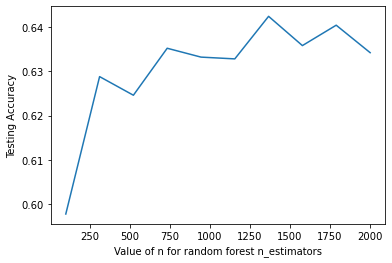

In [96]:
n_range = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
scores = []
for n in n_range:
    random_forest = RandomForestClassifier(n_estimators=n)
    random_forest.fit(X_train_reduced,Y_train)
    y_predict_random_forest = random_forest.predict(X_test_reduced)
    scores.append(metrics.accuracy_score(Y_test,y_predict_random_forest))
    print(f"The score for n_estimators = {n} is:", metrics.accuracy_score(Y_test,y_predict_random_forest))
    
plt.plot(n_range, scores)
plt.xlabel('Value of n for random forest n_estimators')
plt.ylabel('Testing Accuracy')

In [97]:
# Search for parameters to tune
random_forest.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [98]:
# Define the options of the main parameters
criterion = ["gini","entropy","log_loss"]
max_depth = [int(x) for x in np.linspace(start = 0, stop = 300, num = 7)]
max_features=["sqrt", "log2", None]
bootstrap = [True , False]
class_weight= ["balanced", "balanced_subsample",None]
n_estimators = [1350]

param_grid = { 'criterion'   : criterion,
               'max_depth'   : max_depth,
               'max_features': max_features,
               'bootstrap'   : bootstrap,
               'class_weight': class_weight,
               'n_estimators': n_estimators }

In [101]:
# Using RandomizedSearchCV with Kfold CV
kf = KFold(n_splits=10, random_state=42, shuffle=True)
random_forest_grid = RandomizedSearchCV(estimator = random_forest, param_distributions = param_grid, cv = kf, verbose=2, n_jobs = -1)
random_forest_grid.fit(X_train_reduced, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(n_estimators=2000),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [0, 50, 100, 150, 200, 250,
                                                      300],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [1350]},
                   verbose=2)

In [103]:
# print the best score of model that pick from grid search
print("The accuracy of Random Forest with grid search and Kfold is {:0.4f}%".format(random_forest_grid.best_score_*100))

The accuracy of Random Forest with grid search and Kfold is 63.9700%


In [146]:
random_forest_grid.best_params_

{'n_estimators': 1350,
 'max_features': 'sqrt',
 'max_depth': 100,
 'criterion': 'entropy',
 'class_weight': 'balanced_subsample',
 'bootstrap': False}

In [104]:
# Classification report
random_forest_prec = precision_score(y_predict_random_forest,Y_test, average='macro')
print('precision:',random_forest_prec)
random_forest_recall = recall_score(y_predict_random_forest,Y_test, average='macro')
print('recall:',random_forest_recall)
random_forest_f1 = f1_score(y_predict_random_forest,Y_test, average='macro')
print('f1:',random_forest_f1)
random_forest_f2 = metrics.fbeta_score(y_predict_random_forest, Y_test, beta=3,average='macro')
print("f2:",random_forest_f2)

precision: 0.6338805119267109
recall: 0.6368101668333321
f1: 0.6321084778338417
f2: 0.6353357818048788


### Model #4 : AdaBoost

In [108]:
# Using AdaBoost Voting model
random_forest = RandomForestClassifier()
ada_boost = AdaBoostClassifier(base_estimator=random_forest)
ada_boost.fit(X_train_reduced, Y_train)
y_predict_ada_boost = ada_boost.predict(X_test_reduced)
ada_accuracy = accuracy_score(Y_test,y_predict_ada_boost)

In [109]:
print("The accuracy of AdaBoost model is {:0.4f}%".format(ada_accuracy*100))

The accuracy of AdaBoost model is 59.4200%


The score for n_estimators = 100 is: 0.6016
The score for n_estimators = 311 is: 0.6008
The score for n_estimators = 522 is: 0.5982
The score for n_estimators = 733 is: 0.593
The score for n_estimators = 944 is: 0.6
The score for n_estimators = 1155 is: 0.6034
The score for n_estimators = 1366 is: 0.6148
The score for n_estimators = 1577 is: 0.6086
The score for n_estimators = 1788 is: 0.6038
The score for n_estimators = 2000 is: 0.5988


Text(0, 0.5, 'Testing Accuracy')

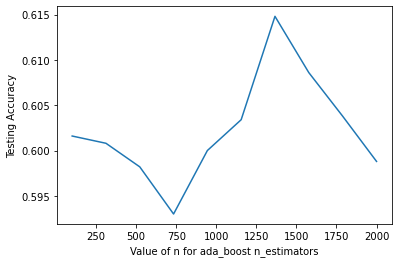

In [111]:
n_range = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
scores = []
for n in n_range:
    ada_boost = AdaBoostClassifier(base_estimator=random_forest,n_estimators=n)
    ada_boost.fit(X_train_reduced, Y_train)
    y_predict_ada_boost = ada_boost.predict(X_test_reduced)
    scores.append(metrics.accuracy_score(Y_test,y_predict_ada_boost))
    print(f"The score for n_estimators = {n} is:", metrics.accuracy_score(Y_test,y_predict_ada_boost))
    
plt.plot(n_range, scores)
plt.xlabel('Value of n for ada_boost n_estimators')
plt.ylabel('Testing Accuracy')

In [143]:
# Search for parameters to tune
ada_boost.get_params().keys()

dict_keys(['algorithm', 'base_estimator__bootstrap', 'base_estimator__ccp_alpha', 'base_estimator__class_weight', 'base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__max_samples', 'base_estimator__min_impurity_decrease', 'base_estimator__min_impurity_split', 'base_estimator__min_samples_leaf', 'base_estimator__min_samples_split', 'base_estimator__min_weight_fraction_leaf', 'base_estimator__n_estimators', 'base_estimator__n_jobs', 'base_estimator__oob_score', 'base_estimator__random_state', 'base_estimator__verbose', 'base_estimator__warm_start', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [147]:
learning_rate=[0.001 , 0.1 ,0.5, 1 ,10]
algorithm = ['SAMME', 'SAMME.R']
random_state = [None ,42,100,32,10]
n_estimators = [1350]

param_grid = { 'learning_rate' : learning_rate,
               'algorithm'     : algorithm,
               'random_state'  : random_state,
               'n_estimators'  : n_estimators}

In [148]:
# Using RandomizedSearchCV with Kfold CV
kf = KFold(n_splits=10, random_state=42, shuffle=True)
ada_boost_grid = RandomizedSearchCV(estimator = ada_boost, param_distributions = param_grid, cv = kf, verbose=2, n_jobs = -1)
ada_boost_grid.fit(X_train_reduced, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(),
                                                n_estimators=2000),
                   n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.001, 0.1, 0.5, 1,
                                                          10],
                                        'n_estimators': [1350],
                                        'random_state': [None, 42, 100, 32,
                                                         10]},
                   verbose=2)

In [150]:
# print the best score of model that pick from grid search
print("The accuracy of AdaBoost with grid search and Kfold is {:0.4f}%".format(ada_boost_grid.best_score_*100))

The accuracy of AdaBoost with grid search and Kfold is 60.0500%


In [112]:
ada_boost_prec = precision_score(y_predict_ada_boost,Y_test, average='macro')
print('precision:',ada_boost_prec)
ada_boost_recall = recall_score(y_predict_ada_boost,Y_test, average='macro')
print('recall:',ada_boost_recall)
ada_boost_f1 = f1_score(y_predict_ada_boost,Y_test, average='macro')
print('f1:',ada_boost_f1)
ada_boost_f2 = metrics.fbeta_score(y_predict_ada_boost, Y_test, beta=3,average='macro')
print("f2:",ada_boost_f2)

precision: 0.5988274332991086
recall: 0.5988388197515857
f1: 0.598794800380613
f2: 0.5988238823882388


### Model #5 : Hard and Soft Voting


In [113]:
# Using Hard and Soft Voting model
model_1 = knn
model_2 = random_forest
model_3 = logistic_regression
model_4 = ada_boost

In [187]:
voting_clf = VotingClassifier([('knn', model_1), ('random_forest', model_2), ('logistic_regression', model_3),('ada_boost',model_4)])
voting_clf.fit(X_train_reduced, Y_train)
y_predict_voting_clf = voting_clf.predict(X_test_reduced)
voting_clf_accuracy = accuracy_score(Y_test,y_predict_voting_clf)

In [176]:
print("The accuracy of the Voting model is {:0.4f}%".format(hard_voting_accuracy *100))

The accuracy of the Voting model is 61.1000%


In [179]:
# Define the options of the main parameters
voting =['hard','soft']
weights = [(1,1,1,1),(1,1,1,2),(1,1,2,1),(1,2,1,1),(2,1,1,1),
           (1,1,2,2),(1,2,1,2),(2,1,1,2),(1,2,2,1),(2,1,2,1),
           (2,2,1,1),(1,2,2,2),(2,1,2,2),(2,2,2,1),(2,2,1,2)]
flatten_transform = [True , False]
verbose = [True , False]

param_grid = { 'voting'             : voting,
               'weights'            : weights,
               'flatten_transform'  : flatten_transform,
               'verbose'            : verbose}

In [180]:
# Using GridSearchCV with Kfold CV
voting_model = VotingClassifier([('knn', model_1), ('random_forest', model_2), ('logistic_regression', model_3),('ada_boost',model_4)])
kf = KFold(n_splits=10, random_state=42, shuffle=True)
voting_model_grid = GridSearchCV(estimator = voting_model, param_grid = param_grid, cv = kf, verbose=2, n_jobs = 4)
voting_model_grid.fit(X_train_reduced, Y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[Voting] ...................... (1 of 4) Processing knn, total=   0.1s
[Voting] ............ (2 of 4) Processing random_forest, total=  32.7s
[Voting] ...... (3 of 4) Processing logistic_regression, total=   0.5s
[Voting] ................ (4 of 4) Processing ada_boost, total=  33.8s


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=VotingClassifier(estimators=[('knn',
                                                     KNeighborsClassifier(n_neighbors=30)),
                                                    ('random_forest',
                                                     RandomForestClassifier()),
                                                    ('logistic_regression',
                                                     LogisticRegression()),
                                                    ('ada_boost',
                                                     AdaBoostClassifier(base_estimator=RandomForestClassifier(),
                                                                        n_estimators=2000))]),
             n_jobs=4,
             param_grid={'flatten_transform': [True, False],
                         'verbose': [True, False], 'voting': ['hard', 'soft'],
                         'weights': [(1, 1

In [184]:
# print the best score of model that pick from grid search
print("The accuracy of Voting with grid search and Kfold is {:0.4f}%".format(voting_model_grid.best_score_*100))

The accuracy of Voting with grid search and Kfold is 63.3600%


In [185]:
voting_model_grid.best_params_

{'flatten_transform': True,
 'verbose': True,
 'voting': 'soft',
 'weights': (2, 2, 1, 2)}

In [188]:
voting_clf_prec = precision_score(y_predict_voting_clf,Y_test, average='macro')
print('precision:',voting_clf_prec)
voting_clf_recall = recall_score(y_predict_voting_clf,Y_test, average='macro')
print('recall:',voting_clf_recall)
voting_clf_f1 = f1_score(y_predict_voting_clf,Y_test, average='macro')
print('f1:',voting_clf_f1)
voting_clf_f2 = metrics.fbeta_score(y_predict_voting_clf, Y_test, beta=3,average='macro')
print("f2:",voting_clf_f2)

precision: 0.6151883100456824
recall: 0.6239851792250127
f1: 0.6078706685428641
f2: 0.6186836033013376


### Model #6 : Bagging and Pasting

In [196]:
bagging = BaggingClassifier(RandomForestClassifier(),bootstrap=True, n_jobs=-1)
bagging.fit(X_train_reduced, Y_train)
y_predict_bagging = bagging.predict(X_test_reduced)
bagging_accuracy = accuracy_score(Y_test,y_predict_bagging)

In [197]:
print("The accuracy of Bagging Classifier model is {:0.4f}%".format(bagging_accuracy*100))

The accuracy of Bagging Classifier model is 62.4600%


In [198]:
bagging_prec = precision_score(y_predict_bagging,Y_test, average='macro')
print('precision:',bagging_prec)
bagging_recall = recall_score(y_predict_bagging,Y_test, average='macro')
print('recall:',bagging_recall)
bagging_f1 = f1_score(y_predict_bagging,Y_test, average='macro')
print('f1:',bagging_f1)
bagging_f2 = metrics.fbeta_score(y_predict_bagging, Y_test, beta=3,average='macro')
print("f2:",bagging_f2)

precision: 0.6243542474982315
recall: 0.6259544644529855
f1: 0.6233064494150332
f2: 0.6251238323414062


In [199]:
pasting = BaggingClassifier(RandomForestClassifier(), bootstrap=False, n_jobs=-1)
pasting.fit(X_train_reduced, Y_train)
y_predict_pasting = pasting.predict(X_test_reduced)
pasting_accuracy = accuracy_score(Y_test,y_predict_pasting)

In [200]:
print("The accuracy of Pasting Classifier model is {:0.4f}%".format(pasting_accuracy*100))

The accuracy of Pasting Classifier model is 63.5200%


In [201]:
pasting_prec = precision_score(y_predict_pasting,Y_test, average='macro')
print('precision:',pasting_prec)
pasting_recall = recall_score(y_predict_pasting,Y_test, average='macro')
print('recall:',pasting_recall)
pasting_f1 = f1_score(y_predict_pasting,Y_test, average='macro')
print('f1:',pasting_f1)
pasting_f2 = metrics.fbeta_score(y_predict_pasting, Y_test, beta=3,average='macro')
print("f2:",pasting_f2)

precision: 0.6349201320537565
recall: 0.6371791319903062
f1: 0.633584488667154
f2: 0.6360563745762987


### Model #7 : Gradient Boosting

In [126]:
gradient=GradientBoostingClassifier()
gradient.fit(X_train_reduced, Y_train)
y_predict_gradient = gradient.predict(X_test_reduced)
gradient_accuracy=accuracy_score(Y_test,y_predict_gradient)

In [127]:
print("The accuracy of Gradient Boosting model is {:0.4f}%".format(gradient_accuracy*100))

The accuracy of Gradient Boosting model is 63.6400%


In [128]:
gradient_prec = precision_score(y_predict_gradient,Y_test, average='macro')
print('precision:',gradient_prec)
gradient_recall = recall_score(y_predict_gradient,Y_test, average='macro')
print('recall:',gradient_recall)
gradient_f1 = f1_score(y_predict_gradient,Y_test, average='macro')
print('f1:',gradient_f1)
gradient_f2 = metrics.fbeta_score(y_predict_gradient, Y_test, beta=3,average='macro')
print("f2:",gradient_f2)

precision: 0.6362750382847412
recall: 0.6367323676848919
f1: 0.6360457123382185
f2: 0.63652141348652


### Model #8 : XGBoostClassifier


In [129]:
xgb =  XGBClassifier()
xgb.fit(X_train_reduced, Y_train)
y_predict_xgb = xgb.predict(X_test_reduced)
xgb_accuracy = accuracy_score(Y_test,y_predict_xgb)

In [130]:
print("The accuracy of XGBoostClassifier model is {:0.4f}%".format(xgb_accuracy*100))

The accuracy of XGBoostClassifier model is 63.4200%


In [131]:
xgb_prec = precision_score(y_predict_xgb,Y_test, average='macro')
print('precision:',xgb_prec)
xgb_recall = recall_score(y_predict_xgb,Y_test, average='macro')
print('recall:',xgb_recall)
xgb_f1 = f1_score(y_predict_xgb,Y_test, average='macro')
print('f1:',xgb_f1)
xgb_f2 = metrics.fbeta_score(y_predict_xgb, Y_test, beta=3,average='macro')
print("f2:",xgb_f2)

precision: 0.634220198503043
recall: 0.6342261904761904
f1: 0.63419881480416
f2: 0.634216814186288


### Summary : Temporary summary of the results

In [204]:
# Creating DataFrame of the different model performance
model = ['NaiveBayes','KNN - K-Nearest Neighbors' , 'Random Forest' , 'Logistic Regression' ,
         'AdaBoost' , 'Soft Voting' ,'Bagging','Pasting','Gradient Boosting' ,'XGBoostClassifier']
precision = [naive_bayes_prec,knn_prec , random_forest_prec , logistic_regression_prec,ada_boost_prec,
             voting_clf_prec,bagging_prec ,pasting_prec,gradient_prec,xgb_prec]
recall = [naive_bayes_recall,knn_recall , random_forest_recall , logistic_regression_recall,ada_boost_recall,
         voting_clf_recall,bagging_recall,pasting_recall,gradient_recall,xgb_recall]
f1 = [naive_bayes_f1,knn_f1 , random_forest_f1 , logistic_regression_f1,ada_boost_f1,voting_clf_f1,
      bagging_f1,pasting_f1,gradient_f1,xgb_f1]
f2 = [naive_bayes_f2,knn_f2 , random_forest_f2 , logistic_regression_f2,ada_boost_f2,voting_clf_f2,
      bagging_f2,pasting_f2,gradient_f2,xgb_f2]
accuracy = [naive_bayes_accuracy , knn_grid.best_score_  , random_forest_grid.best_score_ , logistic_regression_grid.best_score_,
            ada_boost_grid.best_score_ , voting_model_grid.best_score_ ,bagging_accuracy,pasting_accuracy,
            gradient_accuracy,xgb_accuracy]

performance ={ 
                   'precision': precision ,
                   'recall' : recall , 
                   'f1' : f1 ,
                   'f2' : f2 ,
                   'accuracy' : accuracy}

performance_data = pd.DataFrame(data = performance ,index=model)
performance_data

precision    recall        f1        f2  accuracy
NaiveBayes                  0.573681  0.577356  0.568276  0.574301   0.57320
KNN - K-Nearest Neighbors   0.614976  0.615692  0.614266  0.615234   0.60095
Random Forest               0.633881  0.636810  0.632108  0.635336   0.63970
Logistic Regression         0.559228  0.559236  0.559193  0.559221   0.57170
AdaBoost                    0.598827  0.598839  0.598795  0.598824   0.60050
Soft Voting                 0.615188  0.623985  0.607871  0.618684   0.63360
Bagging                     0.624354  0.625954  0.623306  0.625124   0.62460
Pasting                     0.634920  0.637179  0.633584  0.636056   0.63520
Gradient Boosting           0.636275  0.636732  0.636046  0.636521   0.63640
XGBoostClassifier           0.634220  0.634226  0.634199  0.634217   0.63420

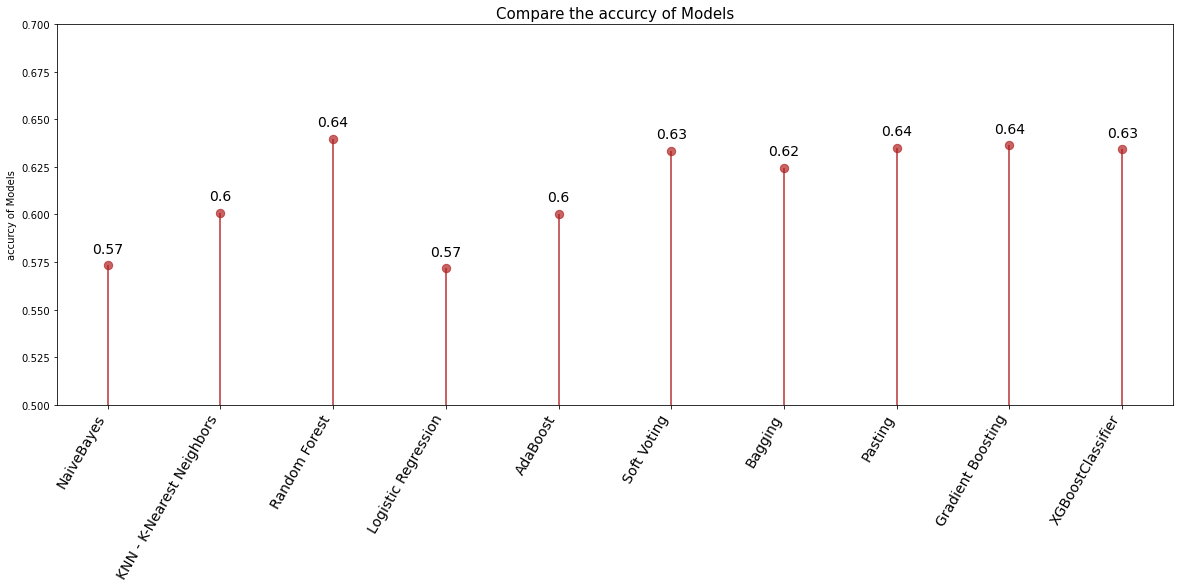

In [205]:
# Draw plot of Compare the accurcy of Models
fig, ax = plt.subplots(figsize=(20,7))
ax.vlines(x=performance_data.index, ymin=0, ymax=performance_data.accuracy, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=performance_data.index, y=performance_data.accuracy, s=70, color='firebrick', alpha=0.7)
ax.set_title('Compare the accurcy of Models', fontdict={'size':15})
ax.set_ylabel('accurcy of Models')
ax.set_xticks(performance_data.index)
ax.set_xticklabels(performance_data.index, rotation=60, fontdict={'horizontalalignment': 'right', 'size':14})
ax.set_ylim(0.5,0.7)
for row in performance_data.itertuples():
    ax.text(row.Index, row.accuracy+.005, s=round(row.accuracy, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

In [206]:
performance_data.loc[(performance_data.index),('accuracy')]

NaiveBayes                   0.57320
KNN - K-Nearest Neighbors    0.60095
Random Forest                0.63970
Logistic Regression          0.57170
AdaBoost                     0.60050
Soft Voting                  0.63360
Bagging                      0.62460
Pasting                      0.63520
Gradient Boosting            0.63640
XGBoostClassifier            0.63420
Name: accuracy, dtype: float64

### The Best Model : The model with the best performance

- The best model is **Gradient Boosting** with **64 precent** of accuracy
- Keep in mind that we have not yet to tune the parameter of the individual models it's highly likely that the <br> accuracy of the ensemble could be improved even further by tuning each model within the ensemble model.<br>
- In addition it is important to note that the score was obtained only for **384 features** <br>
  from the data which are **90 percent** of  the variance by using **PCA**

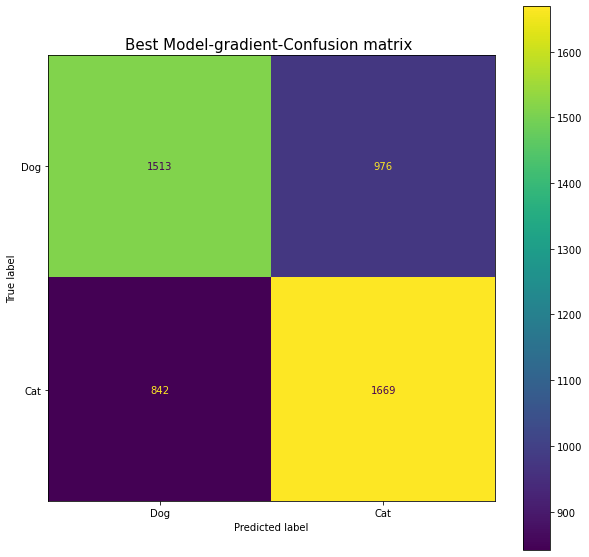

In [208]:
# Plot confusion matrix of the best model
confusion_matrix_gradient = confusion_matrix(Y_test, y_predict_gradient)
ConfusionMatrixDisplay_gradient = ConfusionMatrixDisplay(confusion_matrix_gradient , display_labels=['Dog', 'Cat'])
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Best Model-gradient-Confusion matrix ", size=15)
ConfusionMatrixDisplay_gradient.plot(ax=ax);